In [2]:
!pip install cPickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cPickle (from versions: none)
ERROR: No matching distribution found for cPickle
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import pickle
import os
from multiprocessing import Pool
import sys
import numpy as np

In [2]:
chan = ['Fp1','AF3','F3','F7','FC5','FC1','C3','T7','CP5','CP1','P3','P7','PO3','O1','Oz','Pz','Fp2','AF4','Fz','F4','F8','FC6','FC2','Cz','C4','T8','CP6','CP2','P4','P8','PO4','O2']
nLabel, nTrial, nUser, nChannel, nTime  = 4, 40, 32, 32, 8064

We are using data from 32 channels here and the ignoring the last 8 which are :
33	hEOG (horizontal EOG, hEOG1 - hEOG2)	
34	vEOG (vertical EOG, vEOG1 - vEOG2)
35	zEMG (Zygomaticus Major EMG, zEMG1 - zEMG2)
36	tEMG (Trapezius EMG, tEMG1 - tEMG2)
37	GSR (values from Twente converted to Geneva format (Ohm))
38	Respiration belt
39	Plethysmograph
40	Temperature

In [3]:
fout_labels0 = open("labels_0.dat",'w')
fout_labels1 = open("labels_1.dat",'w')
fout_labels2 = open("labels_2.dat",'w')
fout_labels3 = open("labels_3.dat",'w')

In [4]:
# We had to changes this default encoding to enable reading the dataset with pickle
print(sys.getdefaultencoding())

utf-8


In [13]:
#from importlib import reload
# import sys
# reload(sys)  
# sys.setdefaultencoding('Cp1252')
# CAttributeError: module 'sys' has no attribute 'setdefaultencoding'

In [12]:
#import io
#with io.open("D://PracticumProject1//Data//DEAP//data_preprocessed_python//s01.dat", "r", encoding="utf-8") as my_file:
#     my_unicode_string = my_file.read() 
        
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 128: invalid start byte

In [5]:
import pandas as pd

In [7]:
deap_df = pickle.load(open('D://PracticumProject1//Data//DEAP//data_preprocessed_python//s01.dat', 'rb'), encoding='iso-8859-1')

In [8]:
type(deap_df)

dict

In [9]:
deap_df.keys()

dict_keys(['labels', 'data'])

In [10]:
deap_df['data'].shape

(40, 40, 8064)

This stands for video/trial x channel x data

In [11]:
deap_df['labels'].shape

(40, 4)

video/trial x label (valence, arousal, dominance, liking). As seen below each of the values for valence, arousal, dominance, liking are on a scale of 1 to 10 and will translate to corresponding emotion state.

In [14]:
deap_df['labels'][1]

array([8.1 , 7.31, 7.28, 8.47])

The EEG data for the 32 participants is available in 32 .data file named as s01.dat....s32.dat. In the following code to will extract the data for each channel and for each trail,per person. The four labels are stored separately.

In [17]:
for i in range(nUser):#4, 40, 32, 32, 8064
    if i < 10:
        name = '%0*d' % (2,i+1)
    else:
        name = i+1
    
    fname = "D://PracticumProject1//Data//DEAP//data_preprocessed_python//s"+str(name)+".dat"
    x = pickle.load(open(fname, 'rb'),encoding='iso-8859-1')
    print(fname)
    for tr in range(nTrial):
        fout_data = open("features_raw.csv",'w')
        for ch in chan:
            fout_data.write(ch+",")
        fout_data.write("\n")
        for dat in range(nTime):
            for ch in range(nChannel):
                if ch <32:
                    if ch == 31:
                        fout_data.write(str(x['data'][tr][ch][dat]));
                    else:
                        fout_data.write(str(x['data'][tr][ch][dat])+",");
            fout_data.write("\n");
        fout_labels0.write(str(x['labels'][tr][0]) + "\n");
        fout_labels1.write(str(x['labels'][tr][1]) + "\n");
        fout_labels2.write(str(x['labels'][tr][2]) + "\n");
        fout_labels3.write(str(x['labels'][tr][3]) + "\n");
        fout_data.close()
        os.system('python creating_vector.py')
        print("user "+ str(i) +" trail"+ str(tr))

D://PracticumProject1//Data//DEAP//data_preprocessed_python//s01.dat
user 0 trail0
user 0 trail1
user 0 trail2
user 0 trail3
user 0 trail4
user 0 trail5
user 0 trail6
user 0 trail7
user 0 trail8
user 0 trail9
user 0 trail10
user 0 trail11
user 0 trail12
user 0 trail13
user 0 trail14
user 0 trail15
user 0 trail16
user 0 trail17
user 0 trail18
user 0 trail19
user 0 trail20
user 0 trail21
user 0 trail22
user 0 trail23
user 0 trail24
user 0 trail25
user 0 trail26
user 0 trail27
user 0 trail28
user 0 trail29
user 0 trail30
user 0 trail31
user 0 trail32
user 0 trail33
user 0 trail34
user 0 trail35
user 0 trail36
user 0 trail37
user 0 trail38
user 0 trail39
D://PracticumProject1//Data//DEAP//data_preprocessed_python//s02.dat
user 1 trail0
user 1 trail1
user 1 trail2
user 1 trail3
user 1 trail4
user 1 trail5
user 1 trail6
user 1 trail7
user 1 trail8
user 1 trail9
user 1 trail10
user 1 trail11
user 1 trail12
user 1 trail13
user 1 trail14
user 1 trail15
user 1 trail16
user 1 trail17
user 1 trail

user 12 trail10
user 12 trail11
user 12 trail12
user 12 trail13
user 12 trail14
user 12 trail15
user 12 trail16
user 12 trail17
user 12 trail18
user 12 trail19
user 12 trail20
user 12 trail21
user 12 trail22
user 12 trail23
user 12 trail24
user 12 trail25
user 12 trail26
user 12 trail27
user 12 trail28
user 12 trail29
user 12 trail30
user 12 trail31
user 12 trail32
user 12 trail33
user 12 trail34
user 12 trail35
user 12 trail36
user 12 trail37
user 12 trail38
user 12 trail39
D://PracticumProject1//Data//DEAP//data_preprocessed_python//s14.dat
user 13 trail0
user 13 trail1
user 13 trail2
user 13 trail3
user 13 trail4
user 13 trail5
user 13 trail6
user 13 trail7
user 13 trail8
user 13 trail9
user 13 trail10
user 13 trail11
user 13 trail12
user 13 trail13
user 13 trail14
user 13 trail15
user 13 trail16
user 13 trail17
user 13 trail18
user 13 trail19
user 13 trail20
user 13 trail21
user 13 trail22
user 13 trail23
user 13 trail24
user 13 trail25
user 13 trail26
user 13 trail27
user 13 trail

user 24 trail0
user 24 trail1
user 24 trail2
user 24 trail3
user 24 trail4
user 24 trail5
user 24 trail6
user 24 trail7
user 24 trail8
user 24 trail9
user 24 trail10
user 24 trail11
user 24 trail12
user 24 trail13
user 24 trail14
user 24 trail15
user 24 trail16
user 24 trail17
user 24 trail18
user 24 trail19
user 24 trail20
user 24 trail21
user 24 trail22
user 24 trail23
user 24 trail24
user 24 trail25
user 24 trail26
user 24 trail27
user 24 trail28
user 24 trail29
user 24 trail30
user 24 trail31
user 24 trail32
user 24 trail33
user 24 trail34
user 24 trail35
user 24 trail36
user 24 trail37
user 24 trail38
user 24 trail39
D://PracticumProject1//Data//DEAP//data_preprocessed_python//s26.dat
user 25 trail0
user 25 trail1
user 25 trail2
user 25 trail3
user 25 trail4
user 25 trail5
user 25 trail6
user 25 trail7
user 25 trail8
user 25 trail9
user 25 trail10
user 25 trail11
user 25 trail12
user 25 trail13
user 25 trail14
user 25 trail15
user 25 trail16
user 25 trail17
user 25 trail18
user 25

In [25]:
fout_labels0.close()
fout_labels1.close()
fout_labels2.close()
fout_labels3.close()
print("\n"+"Print Successful")


Print Successful


In [26]:
#label0=fout_labels0.read()

In [27]:
import csv
from collections import defaultdict
import numpy as np
from scipy.signal import *
from numpy.fft import * 
from scipy import *
from pylab import *
import pywt
fout_data = open("train.csv",'a')
vec = []
chan = ['Fp1','AF3','F3','F7','FC5','FC1','C3','T7','CP5','CP1','P3','P7','PO3','O1','Oz','Pz','Fp2','AF4','Fz','F4','F8','FC6','FC2','Cz','C4','T8','CP6','CP2','P4','P8','PO4','O2']
columns = defaultdict(list) # each value in each column is appended to a list

with open("features_raw.csv") as f:
    reader = csv.DictReader(f) # read rows into a dictionary format
    for row in reader: # read a row as {column1: value1, column2: value2,...}
        for (k,v) in row.items(): # go over each column name and value 
            columns[k].append(v) # append the value into the appropriate list
                                 # based on column name k

for i in chan:
    x = np.array(columns[i]).astype(np.float)
    coeffs = pywt.wavedec(x, 'db4', level=6)
    cA6, cD6, cD5,cD4,cD3,cD2,cD1 = coeffs
    cD5 = np.std(cD5)
    cD4 = np.std(cD4)
    cD3 = np.std(cD3)
    cD2 = np.std(cD2)
    cD1 = np.std(cD1)
    if i =="O2":
        print(cD5)
        print(cD4)
        print(cD3)
        print(cD2)
        print(cD1)
        fout_data.write(str(cD5)+",")
        fout_data.write(str(cD4)+",")
        fout_data.write(str(cD3)+",")
        fout_data.write(str(cD2)+",")
        fout_data.write(str(cD1))
    else:

        fout_data.write(str(cD5)+",")
        fout_data.write(str(cD4)+",")
        fout_data.write(str(cD3)+",")
        fout_data.write(str(cD2)+",")
        fout_data.write(str(cD1)+",")
fout_data.write("\n")
fout_data.close()                

18.39932609935441
28.445004112284643
11.093970764832443
5.286971376500822
2.479507528386985


In [29]:
wave=pywt.wavedec(np.array(columns['Fp1']).astype(np.float), 'db4', level=6)

In [30]:
wave[6]

array([-0.89788633, -1.13808336,  3.45420686, ...,  0.63903515,
       -0.5178569 , -1.36726297])

In [31]:
def format_array(arr):
    return "[%s]" % ", ".join(["%.14f" % x for x in arr])

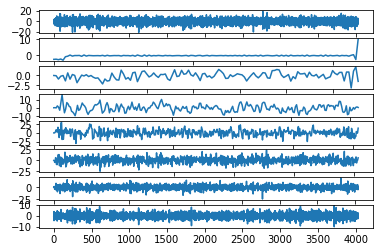

In [118]:
fig, ax = plt.subplots(len(wave)+1)
ax[0].plot(np.array(columns['Fp1']).astype(np.float))
for i, wave in enumerate(wave):
    ax[i+1].plot(wave)

In [37]:
for i in chan:
    x = np.array(columns[i]).astype(np.float)
    coeffs = pywt.wavedec(x, 'db4', level=6)
    cA6, cD6, cD5,cD4,cD3,cD2,cD1 = coeffs
    cD5 = np.std(cD5)
    cD4 = np.std(cD4)
    cD3 = np.std(cD3)
    cD2 = np.std(cD2)
    cD1 = np.std(cD1)
    if i =="O2":
        fout_data.write(str(cD5)+",")
        fout_data.write(str(cD4)+",")
        fout_data.write(str(cD3)+",")
        fout_data.write(str(cD2)+",")
        fout_data.write(str(cD1))
    else:
        fout_data.write(str(cD5)+",")
        fout_data.write(str(cD4)+",")
        fout_data.write(str(cD3)+",")
        fout_data.write(str(cD2)+",")
        fout_data.write(str(cD1)+",")
fout_data.write("\n")
fout_data.close()

In [83]:
from sklearn import svm
import numpy as np
train_y = []
train_a = []
train_x = np.genfromtxt('site//train.csv',delimiter=',')
f = open("labels_0.dat","r")

In [41]:
#f.read()

In [84]:
for i in f:
    train_y.append(i)
train_y = np.array(train_y).astype(np.float)
train_y = train_y.astype(np.int)
train_x = np.array(train_x)
#print "valence",train_y
#print train_x
#print "train_x",train_x
clf = svm.SVC()



In [74]:
train_y=train_y[0:160]

In [81]:
train_y.shape

(1, 160)

In [82]:
train_x.shape

(1, 160)

In [77]:
train_y=train_y.reshape(1, -1)

In [79]:
train_x=train_x.reshape(1, -1)

In [85]:
clf.fit(train_x, train_y)

C:\Users\tabas\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [86]:
f = open("labels_1.dat","r")
for i in f:
    train_a.append(i)
train_a = np.array(train_a).astype(np.float)
train_a = train_a.astype(np.int)
#print "arousal",train_a[1040:1280]
#print "train_x",len(train_x[0:26])
clf1 = svm.SVC()

clf1.fit(train_x, train_a)
#print test_a
predict_al = clf1.predict(train_x)
#print "alrosal",predict_al
predict_val = clf.predict(train_x) 
#print "valence",predict_val 
val_count = al_count = 0
for i in range(len(train_y)):
    if train_y[i] == predict_val[i]:
        val_count = val_count+1
    if train_a[i] == predict_al[i]:
        al_count = al_count+1
print("predicted valence",(float(val_count)/len(train_y))*100)
print("predicted arousal",(float(al_count)/len(train_y))*100)

C:\Users\tabas\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


predicted valence 98.046875
predicted arousal 97.890625
